# Yolov8 Plate Detection

#### Environment

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%pwd

'/content'

In [3]:
%cd /content/drive/MyDrive/Turkish Plate Recognition

/content/drive/MyDrive/Turkish Plate Recognition


In [4]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/201.2 GB disk)


Dataset

In [ ]:
!unzip data/tespit_dataset.zip -d ./data

Archive:  data/tespit_dataset.zip
   creating: ./data/dataset/images/
   creating: ./data/dataset/images/test/
  inflating: ./data/dataset/images/test/1363.png  
  inflating: ./data/dataset/images/test/1364.png  
  inflating: ./data/dataset/images/test/1365.png  
  inflating: ./data/dataset/images/test/1366.png  
  inflating: ./data/dataset/images/test/1367.png  
  inflating: ./data/dataset/images/test/1368.png  
  inflating: ./data/dataset/images/test/1369.png  
  inflating: ./data/dataset/images/test/1370.png  
  inflating: ./data/dataset/images/test/1371.png  
  inflating: ./data/dataset/images/test/1372.png  
  inflating: ./data/dataset/images/test/1373.png  
  inflating: ./data/dataset/images/test/1374.png  
  inflating: ./data/dataset/images/test/1375.png  
  inflating: ./data/dataset/images/test/1376.png  
  inflating: ./data/dataset/images/test/1377.png  
  inflating: ./data/dataset/images/test/1378.png  
  inflating: ./data/dataset/images/test/1379.png  
  inflating: ./data/da

Train

In [ ]:
!yolo detect train data=data/config.yaml model=yolov8n.pt epochs=100 patience=30 imgsz=640 workers=8 batch=12 device=0 name=yolov8n-plate-detection

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/config.yaml, epochs=100, time=None, patience=30, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8n-plate-detection2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

In [ ]:
# !yolo detect train model="runs/detect/yolov8n-plate-detection/weights/last.pt" resume=True

Prediction - Custom Model

In [ ]:
!yolo detect predict model=runs/detect/yolov8n-plate-detection2/weights/best.pt source=data/dataset/images/test save=True

Python Implementation - Custom Model

In [7]:
import glob
from IPython.display import Image, display

for image_path in glob.glob("runs/detect/predict/*.jpg"):
    display(Image(filename=image_path, width=600))

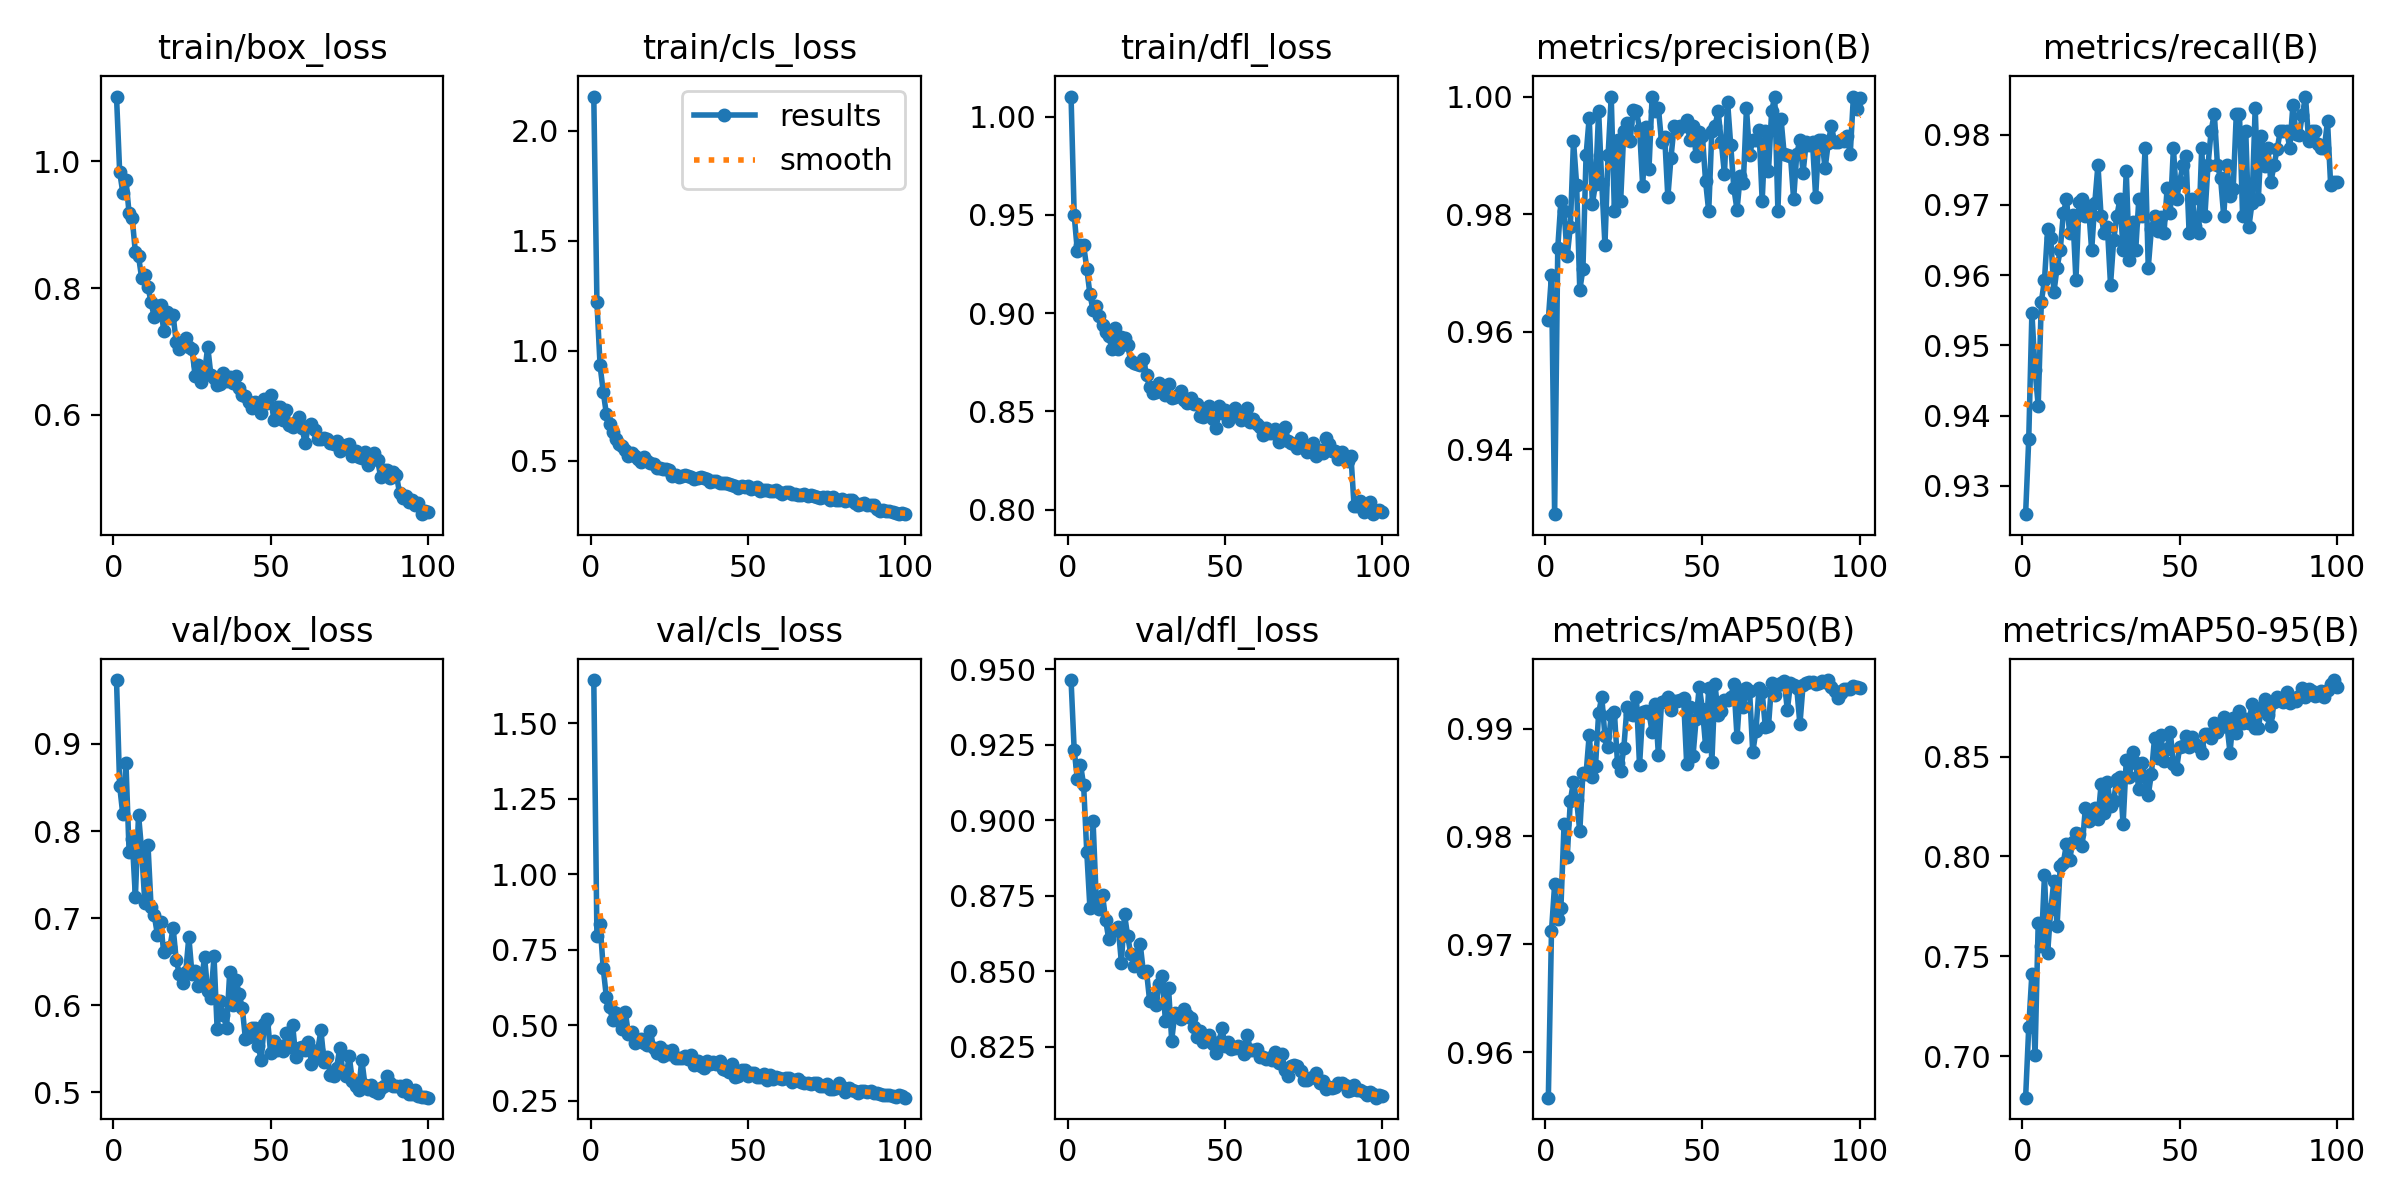

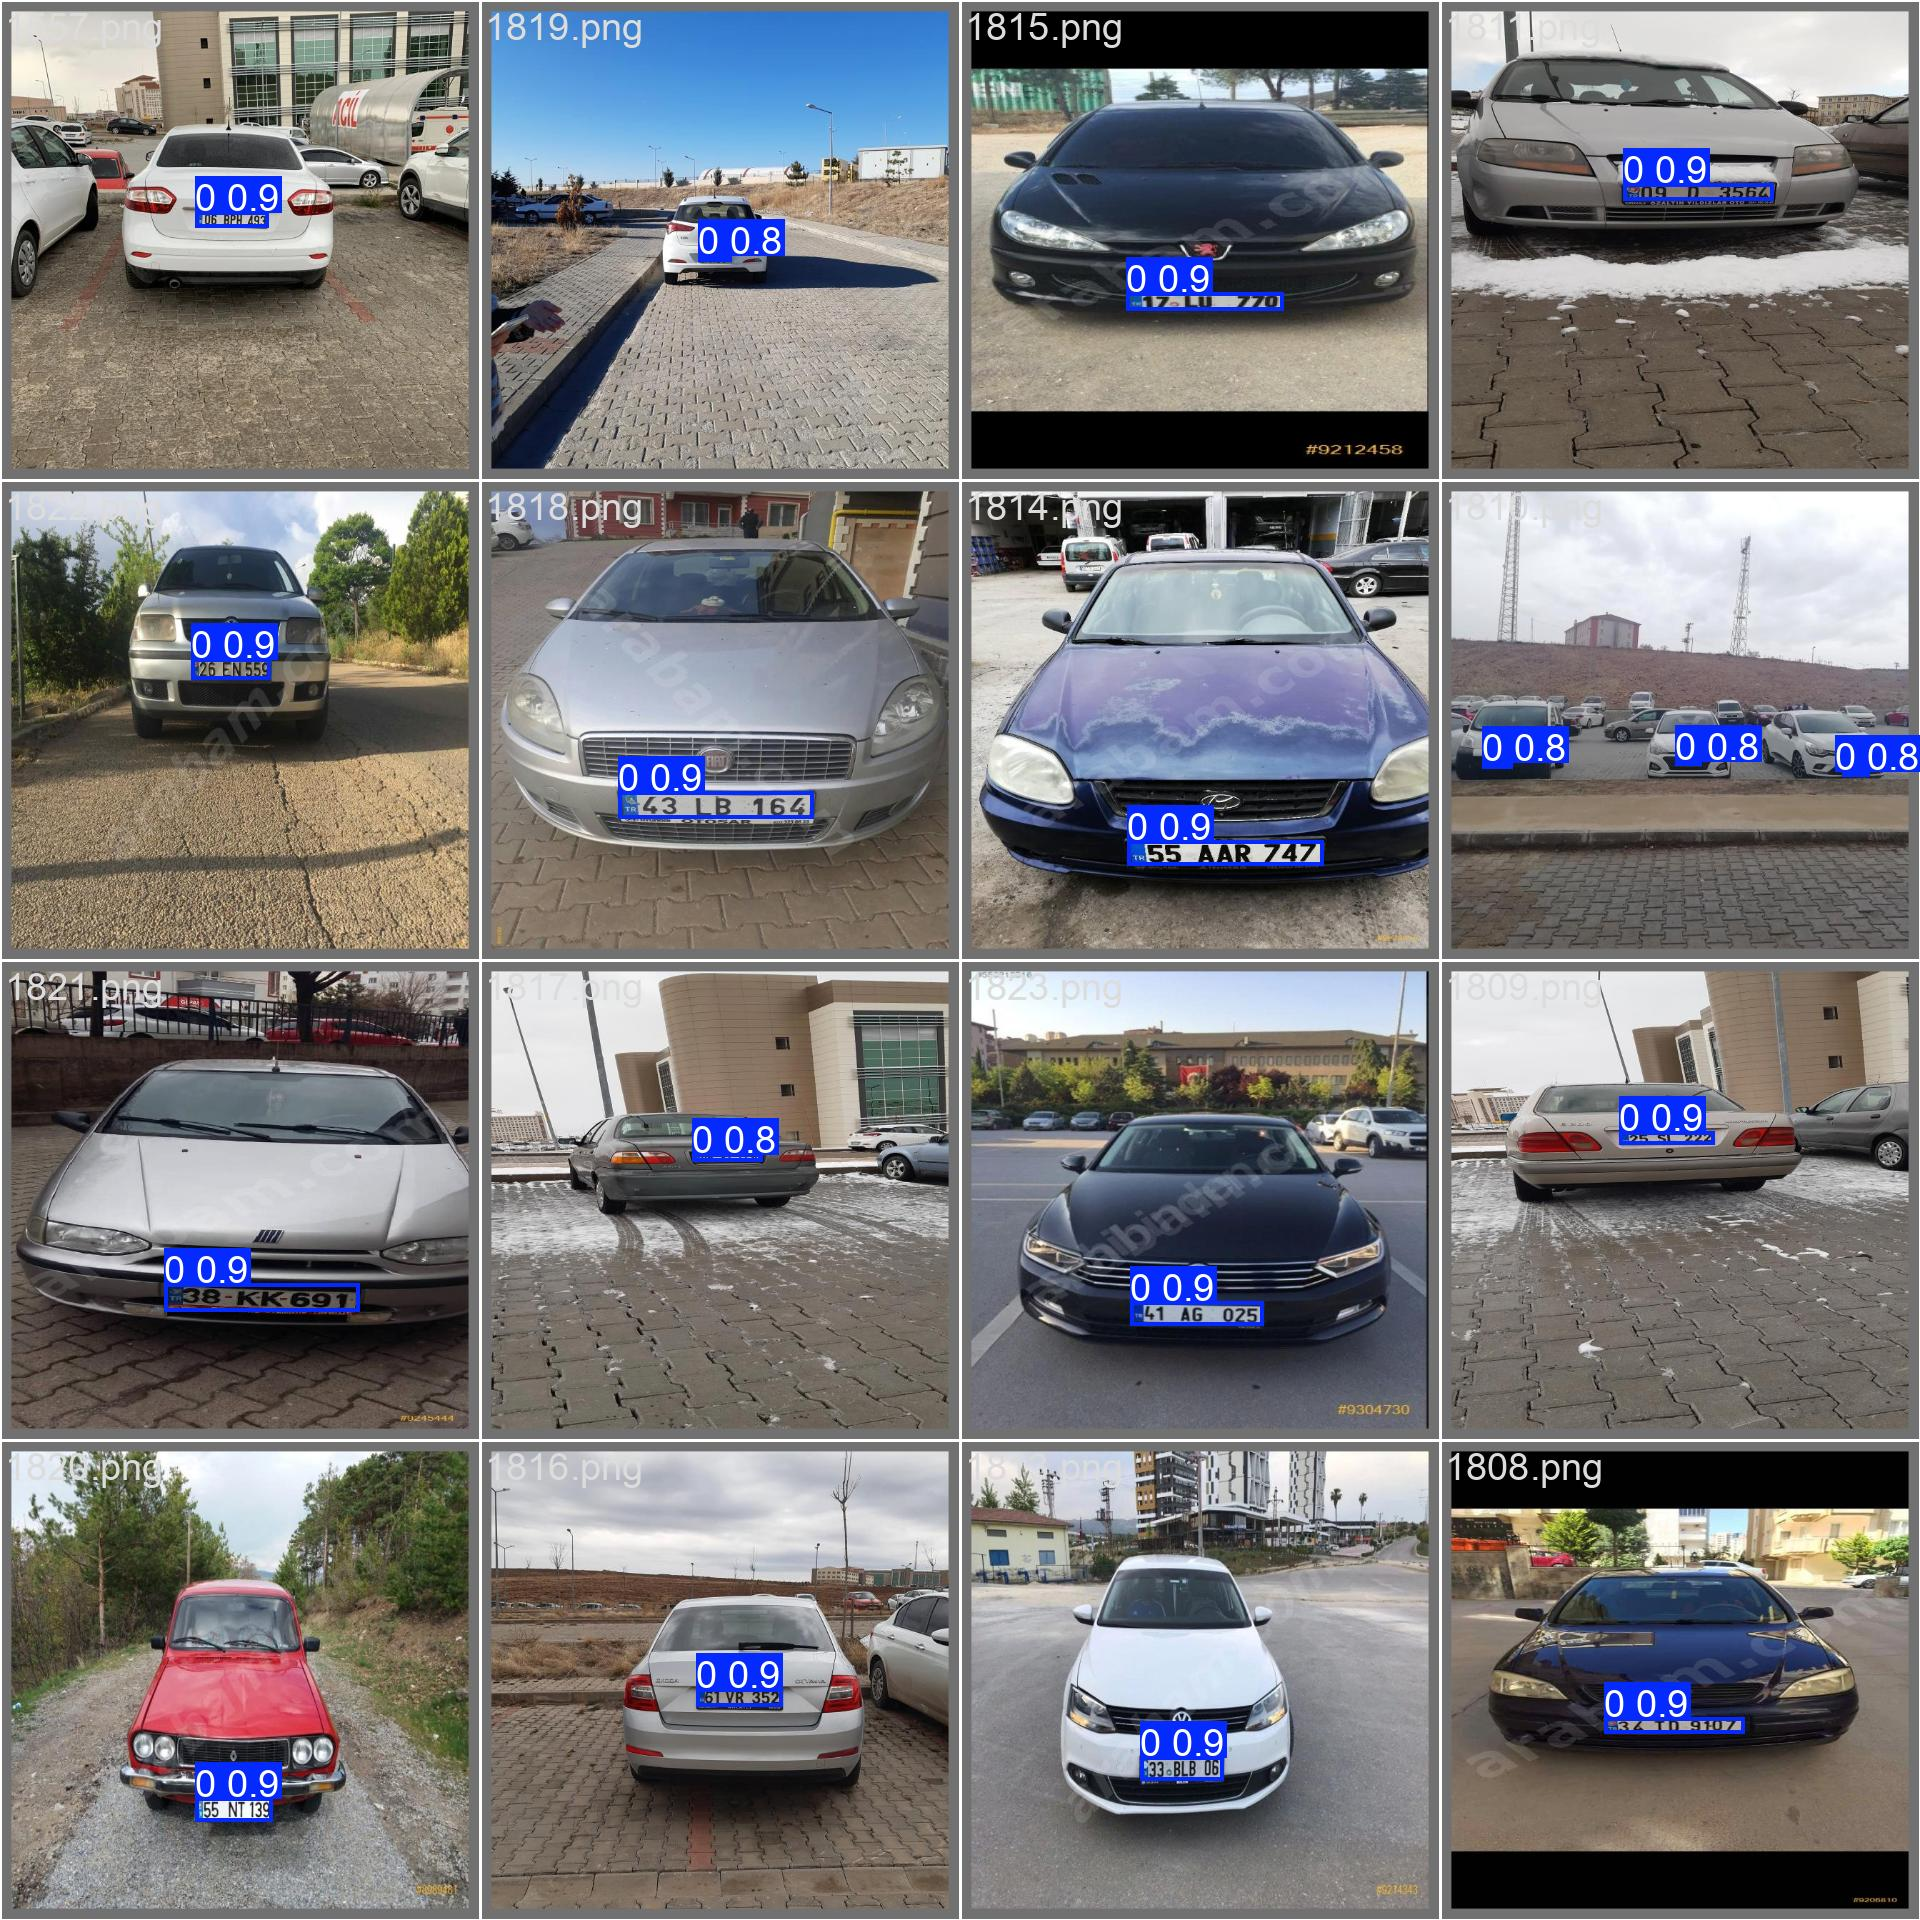

In [9]:
for i in [
    "runs/detect/yolov8n-plate-detection2/results.png",
    "runs/detect/yolov8n-plate-detection2/val_batch0_pred.jpg",
]:
    display(Image(filename=i, width=1000))

In [ ]:
import cv2
from ultralytics import YOLO
import numpy as np

# YOLOv8 modelini yükle
model_path = 'runs/detect/yolov8n-plate-detection2/weights/best.pt'  # Model yolunu buraya ekleyin
model = YOLO(model_path)

# Video dosyalarını belirtin
input_video_path = 'data/araba.mp4'
output_video_path = 'data/output_video4.mp4'

# Video işleme
cap = cv2.VideoCapture(input_video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Fotoğrafı model için uygun formata dönüştür
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = model(img)

    # Tahmin sonuçlarını işleme
    for result in results:
        boxes = result.boxes
        names = result.names

        # Bounding box'ları numpy dizisine çevir
        xyxy = boxes.xyxy.cpu().numpy()
        conf = boxes.conf.cpu().numpy()
        cls = boxes.cls.cpu().numpy()

        for i in range(len(xyxy)):
            x1, y1, x2, y2 = map(int, xyxy[i])
            confidence = conf[i]
            class_id = int(cls[i])
            cls_name = names[class_id]

            # Bounding box ve sınıf etiketini çiz
            color = (0, 255, 0)  # Yeşil renk
            label = f'{cls_name} ({confidence:.2f})'
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Çıktı videosuna frame yaz
    out.write(frame)

# Video dosyalarını serbest bırak
cap.release()
out.release()
cv2.destroyAllWindows()


In [12]:
from IPython.display import HTML
from IPython.display import display

def display_video(video_path):
    """Colab'da bir video dosyasını oynatır."""
    video_tag = f"""
    <video width="640" height="480" controls>
      <source src="{video_path}" type="video/mp4">
      Your browser does not support the video tag.
    </video>
    """
    display(HTML(video_tag))

# Video dosyasının yolunu buraya ekleyin
video_path = 'output_video3.mp4'  # Yüklediğiniz dosyanın adı
display_video(video_path)
